In [3]:
!conda activate kanthmediar


CommandNotFoundError: Your shell has not been properly configured to use 'conda activate'.
To initialize your shell, run

    $ conda init <SHELL_NAME>

Currently supported shells are:
  - bash
  - fish
  - tcsh
  - xonsh
  - zsh
  - powershell

See 'conda init --help' for more information and options.

IMPORTANT: You may need to close and restart your shell after running 'conda init'.




In [2]:
%ls

MEDIAR/  MEDIAR.ipynb  wandb/


In [2]:
# Clone MEDIAR github repo
# !git clone https://github.com/Lee-Gihun/MEDIAR.git
# %rm -rf ./sample_data
%cd MEDIAR



/home/vplab/Desktop/kanth/MEDIAR/MEDIAR


/home/vplab/.local/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [3]:
# # Install dependencies
%pip install -r requirements.txt
%pip install segmentation-models-pytorch==0.3.1
%pip install wandb
!wandb off

Defaulting to user installation because normal site-packages is not writeable


  Using cached segmentation_models_pytorch-0.3.3-py3-none-any.whl (106 kB)
  Using cached timm-0.9.2-py3-none-any.whl (2.2 MB)
  Attempting uninstall: timm
    Found existing installation: timm 0.4.12
    Uninstalling timm-0.4.12:
      Successfully uninstalled timm-0.4.12
  Attempting uninstall: segmentation_models_pytorch
    Found existing installation: segmentation-models-pytorch 0.3.1
    Uninstalling segmentation-models-pytorch-0.3.1:
      Successfully uninstalled segmentation-models-pytorch-0.3.1
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
  Using cached segmentation_models_pytorch-0.3.1-py3-none-any.whl (102 kB)
  Using cached timm-0.4.12-py3-none-any.whl (376 kB)
  Attempting uninstall: timm
    Found existing installation: timm 0.9.2
    Uninstalling timm-0.9.2:
      Successfully uninstalled timm-0.9.2
  Attempting uninstall: segmentation-models-pytorch
    Found existing ins

In [4]:
!pip install gdown

Defaulting to user installation because normal site-packages is not writeable


In [5]:
# Download MEDIAR pretrained weights
%mkdir weights
!gdown https://drive.google.com/uc?id=168MtudjTMLoq9YGTyoD2Rjl_d3Gy6c_L -O weights/from_phase1.pth
!gdown https://drive.google.com/uc?id=1JJ2-QKTCk-G7sp5ddkqcifMxgnyOrXjx -O weights/from_phase2.pth

model_path1 = "./weights/from_phase1.pth"
model_path2 = "./weights/from_phase2.pth"

import torch
weights1 = torch.load(model_path1, map_location="cpu")
weights2 = torch.load(model_path2, map_location="cpu")

mkdir: cannot create directory ‘weights’: File exists
Downloading...
From (original): https://drive.google.com/uc?id=168MtudjTMLoq9YGTyoD2Rjl_d3Gy6c_L
From (redirected): https://drive.google.com/uc?id=168MtudjTMLoq9YGTyoD2Rjl_d3Gy6c_L&confirm=t&uuid=e3959aeb-3a9d-4498-adb2-bc238f4bc784
To: /home/vplab/Desktop/kanth/MEDIAR/MEDIAR/weights/from_phase1.pth
100%|████████████████████████████████████████| 486M/486M [06:16<00:00, 1.29MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1JJ2-QKTCk-G7sp5ddkqcifMxgnyOrXjx
From (redirected): https://drive.google.com/uc?id=1JJ2-QKTCk-G7sp5ddkqcifMxgnyOrXjx&confirm=t&uuid=e02d8cda-4d00-4d24-9f5e-83cf355aefb8
To: /home/vplab/Desktop/kanth/MEDIAR/MEDIAR/weights/from_phase2.pth
100%|████████████████████████████████████████| 486M/486M [06:24<00:00, 1.26MB/s]


In [6]:
import torch
import glob
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np

from train_tools import *
from train_tools.models import MEDIARFormer
from core.MEDIAR import Predictor, EnsemblePredictor

model_args = {
    "classes": 3,
    "decoder_channels": [1024, 512, 256, 128, 64],
    "decoder_pab_channels": 256,
    "encoder_name": 'mit_b5',
    "in_channels": 3
}

model1 = MEDIARFormer(**model_args)
model1.load_state_dict(weights1, strict=False)

model2 = MEDIARFormer(**model_args)
model2.load_state_dict(weights2, strict=False)

<All keys matched successfully>

In [88]:
input_path = "./image/examples"

# img1 = io.imread(f"{input_path}/img1.tiff") #
# io.imshow(img1)

In [7]:
for i in range(7500, 8026):
    input_path = f"split-main/split-{i}"
    output_path = f"results/result-{i}"
    
    try:
        predictor = Predictor(model1, "cuda:0", input_path, output_path, algo_params={"use_tta": False})
        _ = predictor.conduct_prediction()
        print(f"Prediction completed for split-{i}")
    except Exception as e:
        print(f"Error occurred for split-{i}: {e}")
        continue  

Prediction finished: TILE of SECTION_ 43_ 44_tile_0_0.png; img size = torch.Size([1, 3, 128, 128]); costing: 0.78s
Prediction finished: TILE of SECTION_ 43_ 44_tile_0_1.png; img size = torch.Size([1, 3, 128, 128]); costing: 0.16s
Prediction finished: TILE of SECTION_ 43_ 44_tile_0_2.png; img size = torch.Size([1, 3, 128, 128]); costing: 0.17s
Prediction finished: TILE of SECTION_ 43_ 44_tile_0_3.png; img size = torch.Size([1, 3, 128, 128]); costing: 0.16s
Prediction finished: TILE of SECTION_ 43_ 44_tile_0_4.png; img size = torch.Size([1, 3, 128, 128]); costing: 0.18s
Prediction finished: TILE of SECTION_ 43_ 44_tile_0_5.png; img size = torch.Size([1, 3, 128, 128]); costing: 0.17s
Prediction finished: TILE of SECTION_ 43_ 44_tile_0_6.png; img size = torch.Size([1, 3, 128, 128]); costing: 0.17s
Prediction finished: TILE of SECTION_ 43_ 44_tile_0_7.png; img size = torch.Size([1, 3, 128, 128]); costing: 0.17s
Prediction finished: TILE of SECTION_ 43_ 44_tile_1_0.png; img size = torch.Size

In [5]:
%ls
%cd /home/vplab/Desktop/kanth/MEDIAR/MEDIAR

14728.png    generate_mapping.py  main.py                results-4/
14730.png    image/               main.tiff              results-5/
14732.png    LICENSE              PA/                    results-6/
14880.png    main-2.tiff          Performence_Analysis/  results-7/
14882.png    main-3.tiff          predict.py             SetupDict.py
15188.png    main-4.tiff          README.md              train_tools/
15340.png    main-5.tiff          requirements.txt       wandb/
1-split/     main-6.tiff          results/               weights/
config/      main-7.tiff          results-1/
core/        Main_input/          results-2/
evaluate.py  main.png             results-3/
/home/vplab/Desktop/kanth/MEDIAR/MEDIAR


In [8]:
output_path = "PA"
input_path = "Main_input"

predictor = Predictor(model1, "cuda:0", input_path, output_path, algo_params={"use_tta": False})
_ = predictor.conduct_prediction()

Prediction finished: 14730_0_3.jpg; img size = torch.Size([1, 3, 64, 64]); costing: 0.35s
Prediction finished: 14730_1_6.jpg; img size = torch.Size([1, 3, 64, 64]); costing: 0.13s
Prediction finished: 14730_2_4.jpg; img size = torch.Size([1, 3, 64, 64]); costing: 0.13s
Prediction finished: 14730_2_7.jpg; img size = torch.Size([1, 3, 64, 64]); costing: 0.12s
Prediction finished: 14730_4_2.jpg; img size = torch.Size([1, 3, 64, 64]); costing: 0.13s
Prediction finished: 14730_4_5.jpg; img size = torch.Size([1, 3, 64, 64]); costing: 0.12s
Prediction finished: 14730_6_2.jpg; img size = torch.Size([1, 3, 64, 64]); costing: 0.13s
Prediction finished: 14732_1_5.jpg; img size = torch.Size([1, 3, 64, 64]); costing: 0.13s
Prediction finished: 14732_1_7.jpg; img size = torch.Size([1, 3, 64, 64]); costing: 0.12s
Prediction finished: 14732_2_6.jpg; img size = torch.Size([1, 3, 64, 64]); costing: 0.13s
Prediction finished: 14732_3_0.jpg; img size = torch.Size([1, 3, 64, 64]); costing: 0.13s
Prediction


8 Cells detected!


<function matplotlib.pyplot.show(close=None, block=None)>

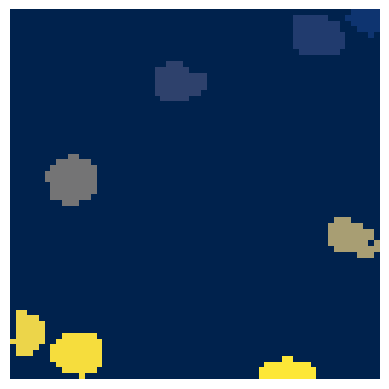

In [114]:
pred1 = io.imread(f"./{output_path}/15188_7_3_label.tiff")
cell_count = len(np.unique(pred1))-1 
print(f"\n{cell_count} Cells detected!")
fig, ax = plt.subplots()
image = ax.imshow(pred1, cmap="cividis")
ax.axis('off') 
plt.show

In [1]:
output_path = "results"

predictor = Predictor(model1, "cuda:0", input_path, output_path, algo_params={"use_tta": False})
_ = predictor.conduct_prediction()


NameError: name 'Predictor' is not defined


185 Cells detected!


<function matplotlib.pyplot.show(close=None, block=None)>

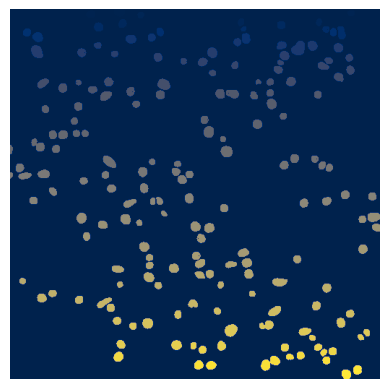

In [37]:
pred1 = io.imread(f"./{output_path}/14728_label.tiff")
cell_count = len(np.unique(pred1))-1 
print(f"\n{cell_count} Cells detected!")
fig, ax = plt.subplots()
image = ax.imshow(pred1, cmap="cividis")
ax.axis('off') 
plt.show


183 Cells detected!


<function matplotlib.pyplot.show(close=None, block=None)>

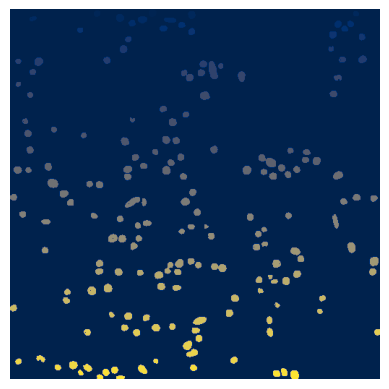

In [38]:
pred1 = io.imread(f"./{output_path}/14730_label.tiff")
cell_count = len(np.unique(pred1))-1 
print(f"\n{cell_count} Cells detected!")
fig, ax = plt.subplots()
image = ax.imshow(pred1, cmap="cividis")
ax.axis('off') 
plt.show


22 Cells detected!


<function matplotlib.pyplot.show(close=None, block=None)>

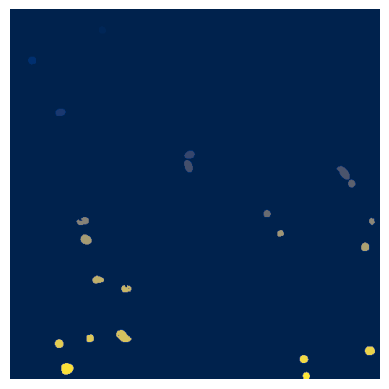

In [39]:
pred1 = io.imread(f"./{output_path}/14732_label.tiff")
cell_count = len(np.unique(pred1))-1 
print(f"\n{cell_count} Cells detected!")
fig, ax = plt.subplots()
image = ax.imshow(pred1, cmap="cividis")
ax.axis('off') 
plt.show


90 Cells detected!


<function matplotlib.pyplot.show(close=None, block=None)>

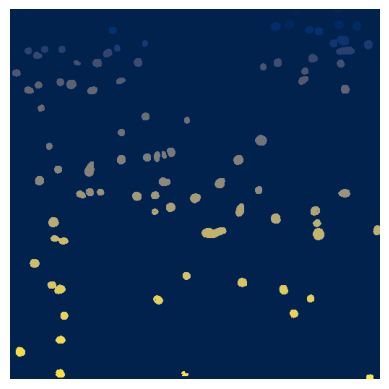

In [40]:
pred1 = io.imread(f"./{output_path}/14880_label.tiff")
cell_count = len(np.unique(pred1))-1 
print(f"\n{cell_count} Cells detected!")
fig, ax = plt.subplots()
image = ax.imshow(pred1, cmap="cividis")
ax.axis('off') 
plt.show


49 Cells detected!


<function matplotlib.pyplot.show(close=None, block=None)>

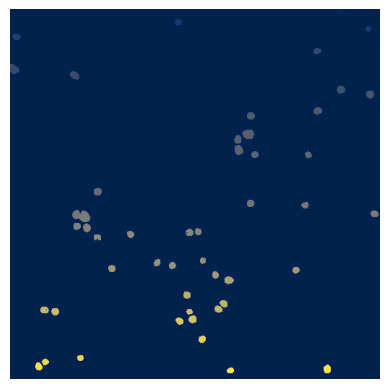

In [41]:
pred1 = io.imread(f"./{output_path}/14882_label.tiff")
cell_count = len(np.unique(pred1))-1 
print(f"\n{cell_count} Cells detected!")
fig, ax = plt.subplots()
image = ax.imshow(pred1, cmap="cividis")
ax.axis('off') 
plt.show


8 Cells detected!


<function matplotlib.pyplot.show(close=None, block=None)>

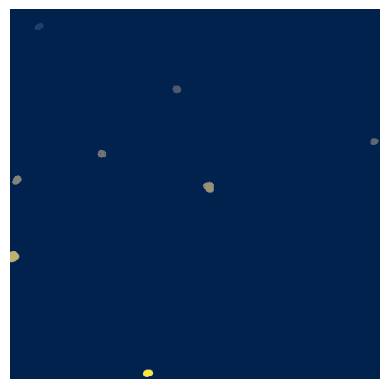

In [36]:
pred1 = io.imread(f"./{output_path}/15188_label.tiff")
cell_count = len(np.unique(pred1))-1 
print(f"\n{cell_count} Cells detected!")
fig, ax = plt.subplots()
image = ax.imshow(pred1, cmap="cividis")
ax.axis('off') 
plt.show


11 Cells detected!


<function matplotlib.pyplot.show(close=None, block=None)>

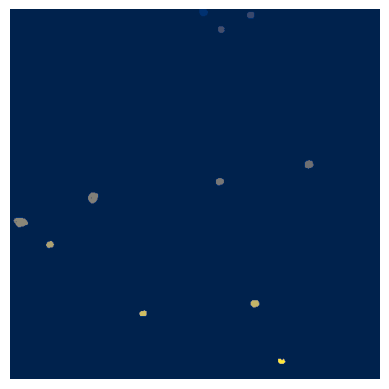

In [35]:
pred1 = io.imread(f"./{output_path}/15340_label.tiff")
cell_count = len(np.unique(pred1))-1 
print(f"\n{cell_count} Cells detected!")
fig, ax = plt.subplots()
image = ax.imshow(pred1, cmap="cividis")
ax.axis('off') 
plt.show

In [9]:
%ls

14728.png    generate_mapping.py  main.py                results-4/
14730.png    image/               main.tiff              results-5/
14732.png    LICENSE              PA/                    results-6/
14880.png    main-2.tiff          Performence_Analysis/  results-7/
14882.png    main-3.tiff          predict.py             SetupDict.py
15188.png    main-4.tiff          README.md              train_tools/
15340.png    main-5.tiff          requirements.txt       wandb/
1-split/     main-6.tiff          results/               weights/
config/      main-7.tiff          results-1/
core/        Main_input/          results-2/
evaluate.py  main.png             results-3/


In [13]:
from PIL import Image
import numpy as np
import os
def split_image(input_path, output_folder):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    image = Image.open(input_path)
    img_array = np.array(image)
    height, width, channels = img_array.shape

    tile_height = height // 8
    tile_width = width // 8

    for i in range(8):
        for j in range(8):
            y_start = i * tile_height
            y_end = (i + 1) * tile_height
            x_start = j * tile_width
            x_end = (j + 1) * tile_width

            tile = img_array[y_start:y_end, x_start:x_end, :]

            tile_image = Image.fromarray(tile)

            output_path = os.path.join(output_folder, f"tile_{i}_{j}.png")

            tile_image.save(output_path)

            print(f"Tile ({i},{j}) saved to: {output_path}")

# Example usage:
input_image_path = "/home/vplab/Desktop/kanth/MEDIAR/MEDIAR/TILE of SECTION_ 48_ 32.jpg"
output_folder_path = "14-split"

# Call the function to split and save the image tiles
split_image(input_image_path, output_folder_path)

Tile (0,0) saved to: 14-split/tile_0_0.png
Tile (0,1) saved to: 14-split/tile_0_1.png
Tile (0,2) saved to: 14-split/tile_0_2.png
Tile (0,3) saved to: 14-split/tile_0_3.png
Tile (0,4) saved to: 14-split/tile_0_4.png
Tile (0,5) saved to: 14-split/tile_0_5.png
Tile (0,6) saved to: 14-split/tile_0_6.png
Tile (0,7) saved to: 14-split/tile_0_7.png
Tile (1,0) saved to: 14-split/tile_1_0.png
Tile (1,1) saved to: 14-split/tile_1_1.png
Tile (1,2) saved to: 14-split/tile_1_2.png
Tile (1,3) saved to: 14-split/tile_1_3.png
Tile (1,4) saved to: 14-split/tile_1_4.png
Tile (1,5) saved to: 14-split/tile_1_5.png
Tile (1,6) saved to: 14-split/tile_1_6.png
Tile (1,7) saved to: 14-split/tile_1_7.png
Tile (2,0) saved to: 14-split/tile_2_0.png
Tile (2,1) saved to: 14-split/tile_2_1.png
Tile (2,2) saved to: 14-split/tile_2_2.png
Tile (2,3) saved to: 14-split/tile_2_3.png
Tile (2,4) saved to: 14-split/tile_2_4.png
Tile (2,5) saved to: 14-split/tile_2_5.png
Tile (2,6) saved to: 14-split/tile_2_6.png
Tile (2,7) 

In [12]:
input_path = "14-split"
output_path = "results-14"

predictor = Predictor(model1, "cuda:0", input_path, output_path, algo_params={"use_tta": False})
_ = predictor.conduct_prediction()


Prediction finished: tile_0_0.png; img size = torch.Size([1, 3, 128, 128]); costing: 0.15s
Prediction finished: tile_0_1.png; img size = torch.Size([1, 3, 128, 128]); costing: 0.15s
Prediction finished: tile_0_2.png; img size = torch.Size([1, 3, 128, 128]); costing: 0.14s
Prediction finished: tile_0_3.png; img size = torch.Size([1, 3, 128, 128]); costing: 0.14s
Prediction finished: tile_0_4.png; img size = torch.Size([1, 3, 128, 128]); costing: 0.16s
Prediction finished: tile_0_5.png; img size = torch.Size([1, 3, 128, 128]); costing: 0.15s
Prediction finished: tile_0_6.png; img size = torch.Size([1, 3, 128, 128]); costing: 0.15s
Prediction finished: tile_0_7.png; img size = torch.Size([1, 3, 128, 128]); costing: 0.17s
Prediction finished: tile_1_0.png; img size = torch.Size([1, 3, 128, 128]); costing: 0.15s
Prediction finished: tile_1_2.png; img size = torch.Size([1, 3, 128, 128]); costing: 0.14s
Prediction finished: tile_1_3.png; img size = torch.Size([1, 3, 128, 128]); costing: 0.16s

In [16]:
from PIL import Image
import os

def combine_images(input_folder, output_path):
    image_files = [f for f in os.listdir(input_folder) if f.endswith(".tiff")]

    image_files.sort()

    grid_size = (8, 8)  # 8 rows x 8 columns
    tile_width, tile_height = Image.open(os.path.join(input_folder, image_files[0])).size
    combined_width = grid_size[1] * tile_width
    combined_height = grid_size[0] * tile_height

    combined_image = Image.new("RGB", (combined_width, combined_height))

    for i in range(grid_size[0]):
        for j in range(grid_size[1]):
            tile_path = os.path.join(input_folder, f"tile_{i}_{j}_label.tiff")
            tile_image = Image.open(tile_path)
            combined_image.paste(tile_image, (j * tile_width, i * tile_height))

    combined_image.save(output_path)
    print(f"Combined image saved to: {output_path}")

input_folder_path = "results-14"
output_image_path = "main-14.tiff"

combine_images(input_folder_path, output_image_path)


Combined image saved to: main-14.tiff


<function matplotlib.pyplot.show(close=None, block=None)>

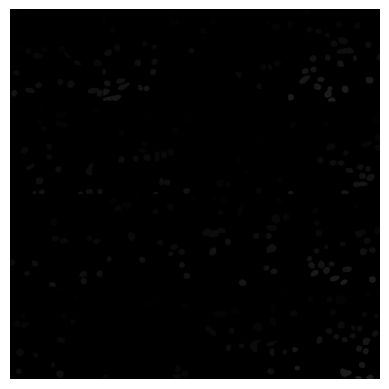

In [70]:
pred1 = io.imread("main-4.tiff")
fig, ax = plt.subplots()
image = ax.imshow(pred1, cmap="cividis")
ax.axis('off') 
plt.show

In [17]:
import cv2
import numpy as np
from PIL import Image

def convert_to_binary(input_image_path, output_image_path):
    img = cv2.imread(input_image_path, cv2.IMREAD_GRAYSCALE)

    _, binary_img = cv2.threshold(img, 1, 255, cv2.THRESH_BINARY)

    binary_img_pil = Image.fromarray(binary_img)
    binary_img_pil.convert("RGB").save(output_image_path)

    print(f"Binary image saved: {output_image_path}")

input_image_path = "main-14.tiff"
output_image_path = "48_32.png"

convert_to_binary(input_image_path, output_image_path)


Binary image saved: 48_32.png


In [46]:
from PIL import Image
import os

def split_image_into_tiles(image_path, output_dir, tile_size=(128, 128)):
    # Open the image
    img = Image.open(image_path)
    
    # Get the filename (without extension) of the image
    image_filename = os.path.splitext(os.path.basename(image_path))[0]
    
    # Create the output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    # Calculate number of tiles
    num_tiles_per_row = img.width // tile_size[0]
    num_tiles_per_col = img.height // tile_size[1]
    
    # Create directory for the image tiles
    image_output_dir = os.path.join(output_dir, image_filename)
    if not os.path.exists(image_output_dir):
        os.makedirs(image_output_dir)
    
    # Iterate over each tile
    for row in range(num_tiles_per_col):
        for col in range(num_tiles_per_row):
            # Define tile bounding box
            left = col * tile_size[0]
            upper = row * tile_size[1]
            right = left + tile_size[0]
            lower = upper + tile_size[1]
            
            # Crop the tile from the image
            tile = img.crop((left, upper, right, lower))
            
            # Save the tile with a sequential filename
            tile_filename = f"{image_filename}_tile_{row * num_tiles_per_row + col + 1}.png"
            tile.save(os.path.join(image_output_dir, tile_filename))

# Example usage:
input_folder = "temp"
output_folder = "split"

# List all image files in the input folder
image_files = [f for f in os.listdir(input_folder) if os.path.isfile(os.path.join(input_folder, f))]

for image_file in image_files:
    image_path = os.path.join(input_folder, image_file)
    split_image_into_tiles(image_path, output_folder)


In [36]:
def prect(input_path,output_path):
        predictor = Predictor(model1, "cuda:0", input_path, output_path, algo_params={"use_tta": False})
        _ = predictor.conduct_prediction()
    

In [49]:
# prect("split/TILE of SECTION_100_ 10","results/result-1")
prect('TILE_of_SECTION_100_ 10','res')

UnboundLocalError: local variable 'mask' referenced before assignment

In [39]:
import os
def prect(input_path,output_path):
        predictor = Predictor(model1, "cuda:0", input_path, output_path, algo_params={"use_tta": False})
        _ = predictor.conduct_prediction()
    

def conduct_predictions_for_split_folders(split_folder, results_folder):
    split_folders = [f for f in os.listdir(split_folder) if os.path.isdir(os.path.join(split_folder, f))]
    
    if not os.path.exists(results_folder):
        os.makedirs(results_folder)
    
    for i, split_subfolder in enumerate(split_folders):
        split_subfolder_path = os.path.join(split_folder, split_subfolder)
        result_subfolder_path = os.path.join(results_folder, f"result-{i + 1}")
        
        if not os.path.exists(result_subfolder_path):
            os.makedirs(result_subfolder_path)
        
        input_path = split_subfolder_path
        print(input_path)
        output_path = result_subfolder_path
        print(output_path)
        prect(input_path,output_path)

# Example usage:
split_folder = "split"
results_folder = "results"

conduct_predictions_for_split_folders(split_folder, results_folder)


split/TILE of SECTION_100_ 10
results/result-1


UnboundLocalError: local variable 'mask' referenced before assignment

In [ ]:
from PIL import Image
import numpy as np
import os

def split_image(input_path, output_folder):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # List all image files in the input folder
    image_files = [f for f in os.listdir(input_path) if f.endswith(('.jpg', '.jpeg', '.png'))]

    # Process each image file in the input folder
    for idx, filename in enumerate(image_files):
        image_path = os.path.join(input_path, filename)
        image = Image.open(image_path)
        img_array = np.array(image)
        height, width, channels = img_array.shape

        tile_height = height // 8
        tile_width = width // 8

        # Create a subfolder for the current image
        image_folder = os.path.join(output_folder, f"split-{idx + 1}")
        if not os.path.exists(image_folder):
            os.makedirs(image_folder)

        for i in range(8):
            for j in range(8):
                y_start = i * tile_height
                y_end = (i + 1) * tile_height
                x_start = j * tile_width
                x_end = (j + 1) * tile_width

                tile = img_array[y_start:y_end, x_start:x_end, :]

                tile_image = Image.fromarray(tile)

                output_path = os.path.join(image_folder, f"{os.path.splitext(filename)[0]}_tile_{i}_{j}.png")

                tile_image.save(output_path)

                print(f"Tile ({i},{j}) of {filename} saved to: {output_path}")

    return f"Split tiles saved in folders: {', '.join([f'split-{i}' for i in range(1, len(image_files) + 1)])}"

# Example usage:
input_folder_path = "/home/vplab/Desktop/kanth/MEDIAR/MEDIAR/Mian- dataset"
output_folder_path = "split-main"

# Call the function to split and save tiles for all images in the input folder
result_message = split_image(input_folder_path, output_folder_path)

# Display the result message
print(result_message)


Tile (0,0) of TILE of SECTION_ 70_  5.jpg saved to: split-main/split-1/TILE of SECTION_ 70_  5_tile_0_0.png
Tile (0,1) of TILE of SECTION_ 70_  5.jpg saved to: split-main/split-1/TILE of SECTION_ 70_  5_tile_0_1.png
Tile (0,2) of TILE of SECTION_ 70_  5.jpg saved to: split-main/split-1/TILE of SECTION_ 70_  5_tile_0_2.png
Tile (0,3) of TILE of SECTION_ 70_  5.jpg saved to: split-main/split-1/TILE of SECTION_ 70_  5_tile_0_3.png
Tile (0,4) of TILE of SECTION_ 70_  5.jpg saved to: split-main/split-1/TILE of SECTION_ 70_  5_tile_0_4.png
Tile (0,5) of TILE of SECTION_ 70_  5.jpg saved to: split-main/split-1/TILE of SECTION_ 70_  5_tile_0_5.png
Tile (0,6) of TILE of SECTION_ 70_  5.jpg saved to: split-main/split-1/TILE of SECTION_ 70_  5_tile_0_6.png
Tile (0,7) of TILE of SECTION_ 70_  5.jpg saved to: split-main/split-1/TILE of SECTION_ 70_  5_tile_0_7.png
Tile (1,0) of TILE of SECTION_ 70_  5.jpg saved to: split-main/split-1/TILE of SECTION_ 70_  5_tile_1_0.png
Tile (1,1) of TILE of SECTIO